# Tasca M5 T02
Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

## Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.
També adjunt trobaràs una descripció de les diferents variables del dataset.

In [1]:
import pandas as pd
import numpy as np

import math
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("/Formación/2022 BarcelonaActiva/CursDSOnline/sprint05_Test_hipotesi_i_machine_learning/housing data.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0.00632  505 non-null    float64
 1   18.00    505 non-null    float64
 2   2.310    505 non-null    float64
 3   0        505 non-null    int64  
 4   0.5380   505 non-null    float64
 5   6.5750   505 non-null    float64
 6   65.20    505 non-null    float64
 7   4.0900   505 non-null    float64
 8   1        505 non-null    int64  
 9   296.0    505 non-null    float64
 10  15.30    505 non-null    float64
 11  396.90   505 non-null    float64
 12  4.98     505 non-null    float64
 13  24.00    505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [3]:
df.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [4]:
#Canvio el nom de les columnes.
df.rename(columns = {
        "0.00632": 'crim',
        "18.00": "zn",
        "2.310": "indus",
        "0": "CHAS",
        "0.5380": "NOX",
        "6.5750": "RM",
        "65.20": "AGE",
        "4.0900":"DIS",
        "1": "RAD",
        "296.0": "TAX",
        "15.30": "PTRATIO",
        "396.90": "b",
        "4.98": " LSTAT",
        "24.00": "MEDV"
    }, inplace=True)
#Transformo el nom de les columnes en minúscula per tractar les dades. 
df.columns = [col.lower() for col in df.columns]
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


Descripció de les variables del dataset
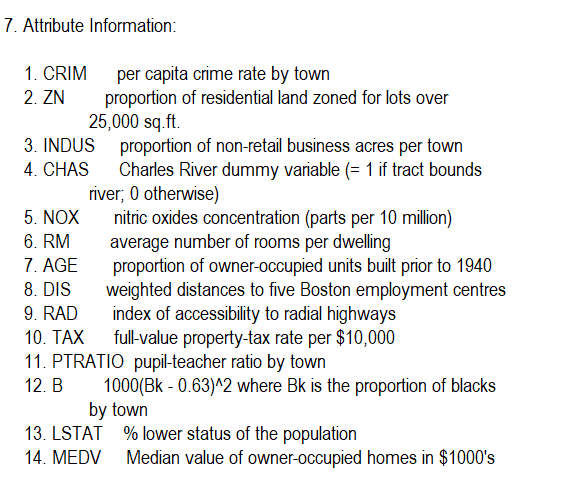

### Divisió del dataset en un conjunt train i una altre test

In [5]:
#Dividim el dataframe en la variable objectiu (y) i les variables d'entrada (X).
y = df["medv"]
X = df.drop(columns="medv")

#Faig un train del 60% i un test del 40%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=12)

In [6]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
126,0.25915,0.0,21.89,0,0.6240,5.693,96.0,1.7883,4,437.0,21.2,392.11,17.19
297,0.06466,70.0,2.24,0,0.4000,6.345,20.1,7.8278,5,358.0,14.8,368.24,4.97
279,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,5,216.0,14.9,387.31,3.76
381,9.18702,0.0,18.10,0,0.7000,5.536,100.0,1.5804,24,666.0,20.2,396.90,23.60
3,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.10290,30.0,4.93,0,0.4280,6.358,52.9,7.0355,6,300.0,16.6,372.75,11.22
253,0.04819,80.0,3.64,0,0.3920,6.108,32.0,9.2203,1,315.0,16.4,392.89,6.57
390,5.29305,0.0,18.10,0,0.7000,6.051,82.5,2.1678,24,666.0,20.2,378.38,18.76
155,2.44668,0.0,19.58,0,0.8710,5.272,94.0,1.7364,5,403.0,14.7,88.63,16.14


In [7]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
188,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398.0,15.2,396.90,5.39
262,0.82526,20.0,3.97,0,0.647,7.327,94.5,2.0788,5,264.0,13.0,393.42,11.25
303,0.05515,33.0,2.18,0,0.472,7.236,41.1,4.0220,7,222.0,18.4,393.68,6.93
234,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307.0,17.4,376.75,10.88
301,0.09266,34.0,6.09,0,0.433,6.495,18.4,5.4917,7,329.0,16.1,383.61,8.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43
139,0.29090,0.0,21.89,0,0.624,6.174,93.6,1.6119,4,437.0,21.2,388.08,24.16
236,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307.0,17.4,390.07,4.73
320,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287.0,19.6,396.90,6.87


In [8]:
y_train

126    16.2
297    22.5
279    45.4
381    11.3
3      36.2
       ... 
241    22.2
253    21.9
390    23.2
155    13.1
331    19.4
Name: medv, Length: 303, dtype: float64

In [9]:
y_test

188    34.9
262    31.0
303    36.1
234    24.0
301    26.4
       ... 
5      22.9
139    14.0
236    31.5
320    23.1
230    31.7
Name: medv, Length: 202, dtype: float64

###  Estudi dels dos conjunts per separat a nivell descriptiu

In [10]:
#Comparo la descripció estadística de les variables de train amb les de tot el dataset i així tenir una idea
#de la representativitat  del train.
ren = {"50%": "median"}
drop = ["count", "25%", "75%"]
train_desc = X_train.describe().T.rename(columns=ren).drop(columns=drop).add_suffix(":train")
X_desc = X.describe().T.rename(columns=ren).drop(columns=drop).add_suffix(":all")
trainFullDesc = pd.concat([X_desc, train_desc], axis=1)
trainFullDesc[trainFullDesc.columns.sort_values()]

,max:all,max:train,mean:all,mean:train,median:all,median:train,min:all,min:train,std:all,std:train
crim,88.9762,88.9762,3.620667,3.426751,0.25915,0.22212,0.00906,0.01096,8.608572,9.122705
zn,100.0000,100.0000,11.350495,10.702970,0.00000,0.00000,0.00000,0.00000,23.343704,22.878079
indus,27.7400,27.7400,11.154257,11.086139,9.69000,9.69000,0.46000,0.46000,6.855868,6.886115
chas,1.0000,1.0000,0.069307,0.085809,0.00000,0.00000,0.00000,0.00000,0.254227,0.280545
nox,0.8710,0.8710,0.554728,0.555567,0.53800,0.53800,0.38500,0.38500,0.115990,0.117428
rm,8.7800,8.7800,6.284059,6.294772,6.20800,6.20900,3.56100,4.13800,0.703195,0.688400
age,100.0000,100.0000,68.581584,69.588449,77.70000,80.80000,2.90000,6.00000,28.176371,27.578898
dis,12.1265,12.1265,3.794459,3.807002,3.19920,3.09930,1.12960,1.12960,2.107757,2.090143
rad,24.0000,24.0000,9.566337,9.310231,5.00000,5.00000,1.00000,1.00000,8.707553,8.554624
tax,711.0000,711.0000,408.459406,407.788779,330.00000,330.00000,187.00000,187.00000,168.629992,167.549385


Es pot observar que els valors estadístics de les variables independents del dataset complet i de les del train són molt semblants (distribucions pràcticament iguals), que és l'objectiu que es busca per mantenir la representativitat del conjunt d'entrenament respecte del domini en la creació del model. La mediana i la variança són quasi idèntiques.  

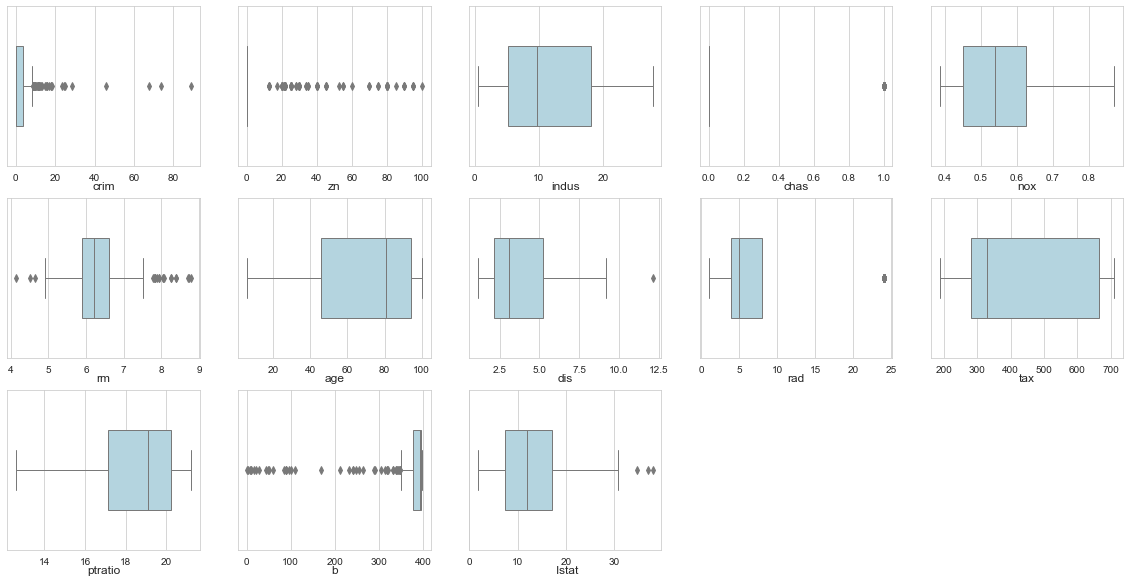

In [11]:
#Dibuixo els boxplots de les dades d'entrada del train.

#Defineixo una funció per dibuixar els gràfics boxplots de les columnes del dataframe.
def drawBoxplots(df, cols, color, orient="h"):  
    cols = list(cols)
    rows = math.ceil(len(cols)/5)
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(20, 10))
    for i, col in zip(range(len(cols)), cols):
        plt.subplot(rows, 5, i+1)
        if orient == "h":
            sns.boxplot(x=col, data=df, color=color, orient=orient, linewidth=1 , width=.5)
            plt.title(col, y = -0.18)
            plt.xlabel("")
    plt.show()
    
#Dibuixo els boxplots de les dades d'entrada del train.
numCols = X_desc.index.tolist()
drawBoxplots(X_train, X_train[numCols], color="lightblue") 

In [12]:
#Extrec les dades estadístiques descriptives, amb la mateixa informació pel conjunt test de variables d'entrada i
#s'observa que tenen una distribució molt semblant.
testDesc = X_test.describe().T.rename(columns=ren).drop(columns=drop).add_suffix(":test")
testDesc[testDesc.columns.sort_values()]

,max:test,mean:test,median:test,min:test,std:test
crim,51.1358,3.911540,0.324035,0.00906,7.787006
zn,95.0000,12.321782,0.000000,0.00000,24.049864
indus,25.6500,11.256436,9.795000,1.52000,6.826038
chas,1.0000,0.044554,0.000000,0.00000,0.206836
nox,0.8710,0.553470,0.538000,0.39200,0.114078
rm,8.3370,6.267990,6.193500,3.56100,0.726253
age,100.0000,67.071287,74.650000,2.90000,29.053200
dis,10.7103,3.775643,3.350850,1.17810,2.138983
rad,24.0000,9.950495,5.000000,1.00000,8.939683
tax,666.0000,409.465347,330.000000,188.00000,170.650734


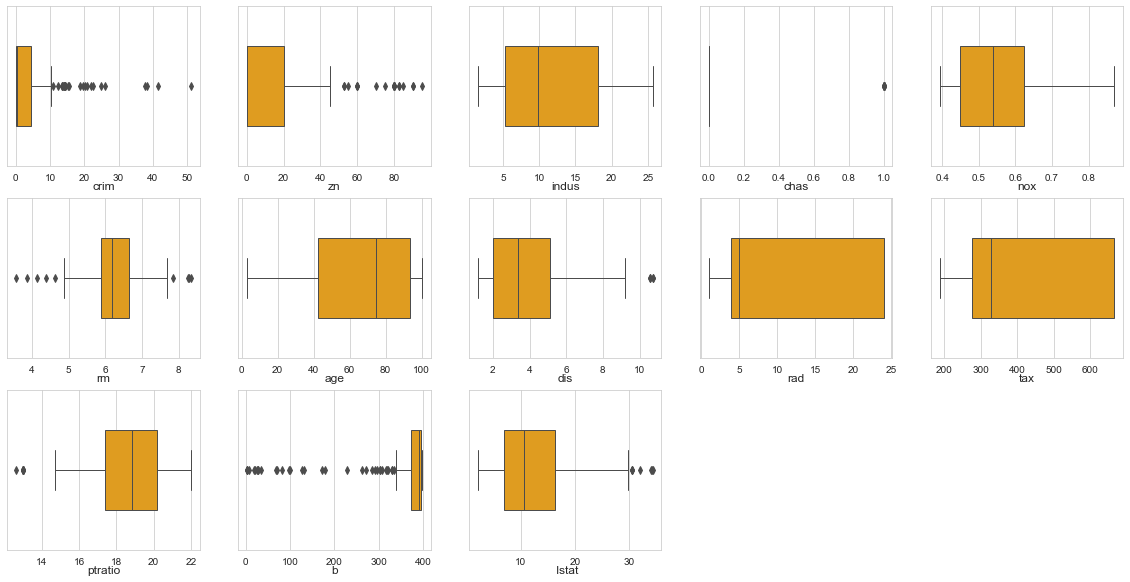

In [13]:
#Dibuixo els boxplots ara per les dades d'entrada del conjunt prova. Es pot observar com són distribucions pràcticament iguals
#al dataset i a l'entrenament a causa que hi ha una quantitat considerable d'instàncies.
drawBoxplots(X_test, X_test[numCols], color="orange")

In [14]:
#Comparo les distribucions de la variable objectiu amb les d'entrenament i de prova.
pd.concat([y.describe(), y_train.describe(), y_test.describe()], axis=1)

,medv,medv,medv
count,505.000000,303.000000,202.000000
mean,22.529901,22.500990,22.573267
std,9.205991,9.467608,8.822054
min,5.000000,5.000000,5.000000
25%,17.000000,16.800000,17.325000
50%,21.200000,20.800000,21.700000
75%,25.000000,24.800000,25.275000
max,50.000000,50.000000,50.000000


S'observem les mateixes distribucions.

## Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

### Estandardització de les dades

In [18]:
#Aplico la transformació lineal d'estandarització a totes les dades
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

scaler.mean_

scaler.scale_

X_scaled = scaler.transform(X_train)
X_scaled

array([[-0.34779608, -0.46860034,  1.57152971, ...,  1.27660527,
         0.36684012,  0.61936619],
       [-0.36915069,  2.5961586 , -1.28675935, ..., -1.75609464,
         0.09052638, -1.11273533],
       [-0.37232165,  0.40704507, -1.12820794, ..., -1.7087087 ,
         0.3112764 , -1.28424457],
       ...,
       [ 0.2049158 , -0.46860034,  1.0202363 , ...,  0.80274591,
         0.20790473,  0.84190296],
       [-0.10760978, -0.46860034,  1.2355171 , ..., -1.80348057,
        -3.14617597,  0.47053586],
       [-0.37244462,  1.06377913, -0.73110214, ..., -0.76098998,
         0.02118749, -0.70734987]])

In [19]:
X_scaled.mean(axis=0)

array([-3.22441010e-17,  0.00000000e+00,  2.93128191e-18, -7.62133297e-17,
       -4.74867670e-16,  2.11052298e-16,  2.19846143e-16, -1.34838968e-16,
       -8.20758936e-17, -9.16025598e-17,  1.14906251e-15, -1.70014351e-16,
        1.87602042e-16])

In [20]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

En els outputs s'observa que les dades escalades tenen mitjana zero i variança unitària.